# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 06.1

Lesson 6 deals with simulations of one-dimensional Ising Model. In particular we want to simulate a system of $N$ spins with nearest neighbors interaction and periodic boundary conditions which Hamiltonian is given by:

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

(we assume $\mu_B=1$ and $k_B=1$).

I completed the provided C++ code implementing both Metropolis ang Gibbs sampling algorithm, also adding the possibility to restart from a previous generated spin configuration.

With this code I produced pictures of internal energy $U(N,T)$, magnetization $M(N,T,h=0.02)$, magnetic susceptibility $\chi(N,T)$ and heat capacity $C(N,T)$ (and their statistical uncertainties using blocking method) as a function of temperature $T$ in the range $\left[0.5;2.5\right]$.

Parameters used for the simulations are:
- $N=50$ spins
- $10^3$ equilibration steps
- $20$ blocks
- $10^5$ steps per block

Pictures of trends of the quantities mentioned above compared with analytical values are shown below.

In [3]:
#Compute analytical values
points=1000
T = np.linspace(0.45,2.05,num=points)
beta = 1/T
J = 1.0
Ns = 50
h=0.02 #external field
b = 1/T
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

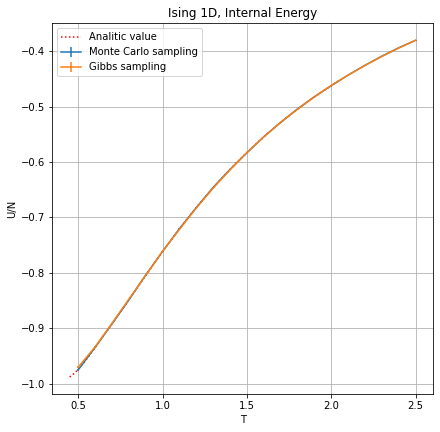

In [32]:
plt.figure(figsize=(15,15))

# Using subplot ambient to draw graphs side by side
plt.subplot(221)
x_ene_m, y_ene_m, yerr_ene_m = np.loadtxt("../results/energy_vs_temperature_metropolis.dat", delimiter = " ", unpack = True)
x_ene_g, y_ene_g, yerr_ene_g = np.loadtxt("../results/energy_vs_temperature_gibbs.dat", delimiter = " ", unpack = True)

plt.errorbar(x_ene_m, y_ene_m, yerr_ene_m, label = "Monte Carlo sampling")
plt.errorbar(x_ene_g, y_ene_g, yerr_ene_g, label = "Gibbs sampling")
plt.plot(T, e, label="Analitic value", color='r', linestyle="dotted")
plt.title('Ising 1D, Internal Energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.grid(True)
plt.legend()

plt.show()

Simulations performed with Monte Carlo and Gibbs sampling produce very similar results, both in good agreement with the exact curves.